## 베이즈 추론 프로그램

In [1]:
import numpy as np

In [2]:
thetas = np.linspace(0, 1, 1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [3]:
likelihood = lambda r : thetas if r else (1 - thetas)

In [5]:
def posterior(r, prior):
    lp = likelihood(r) * prior 
    return lp / lp.sum()

In [6]:
# 사전분포 - 균일 분포 
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [7]:
# 클릭이 일어났을 때(r = 1)일 때 사후 확률
p = posterior(1, p)
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


In [8]:
import matplotlib.pyplot as plt 

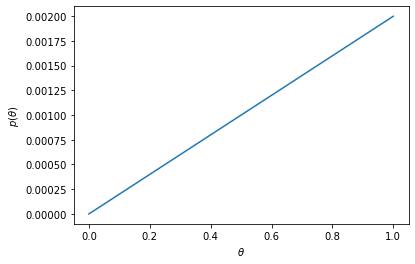

In [9]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [10]:
# A안 
clicks = 2 
noclicks = 38

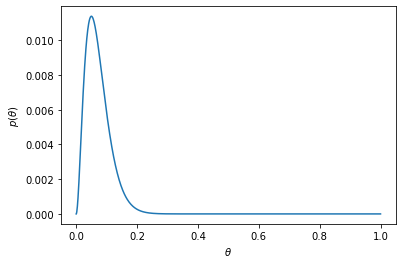

In [11]:
p = np.array([1 / len(thetas) for theta in thetas])

for _ in range(clicks):
    p = posterior(1, p)
for _ in range(noclicks):
    p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()